In [39]:
import numpy as np
import pandas as pd

import warnings

warnings.filterwarnings(action="ignore")

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import seaborn as sns
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)

# Data Preprocessing


**LOADING DATA**


In [40]:
df = pd.read_csv("stroke_data.csv")

In [41]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [43]:
print(df.isna().sum())

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


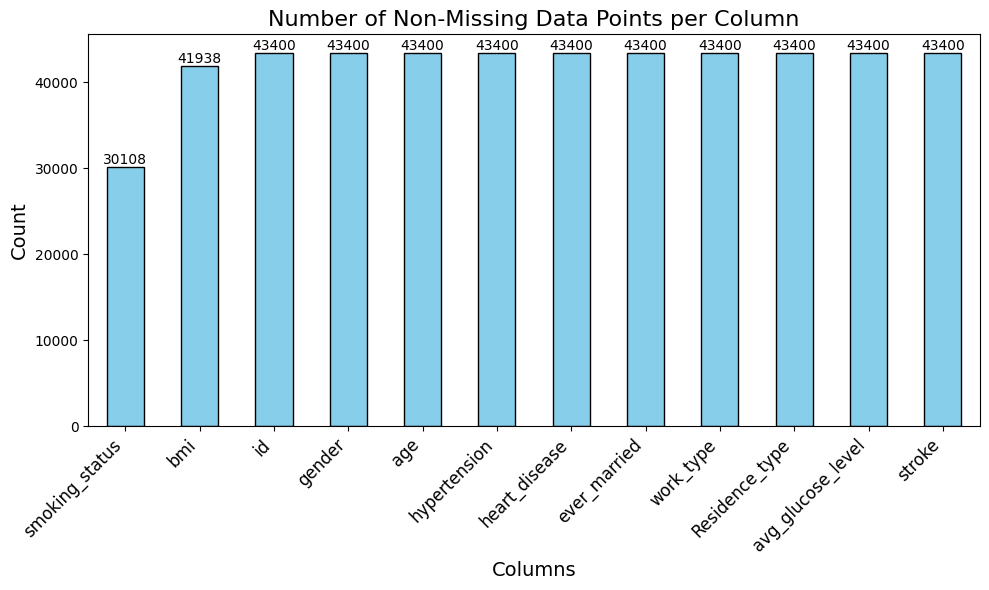

In [44]:
# Count non-null values per column
data_count = df.count()

# Plot the data
plt.figure(figsize=(10, 6))
ax = data_count.sort_values().plot(kind="bar", color="skyblue", edgecolor="black")

# Add data labels on the bars
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
    )

# Customize the plot
plt.title("Number of Non-Missing Data Points per Column", fontsize=16)
plt.xlabel("Columns", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

**DROPPING COLUMN**


In [45]:
df.drop(columns=["id"], axis=1, inplace=True)
print(df.shape)

(43400, 11)


## Imputation


**Imputing Missing Values For smoking_status**


In [46]:
mode_value = df["smoking_status"].mode()[0]
df["smoking_status"] = df["smoking_status"].fillna(mode_value)
print(df["smoking_status"].isna().sum())

0


**Imputing missing Values for BMI**


In [47]:
mode_value = df["bmi"].median()
df["bmi"] = df["bmi"].fillna(mode_value)
print(df["bmi"].isna().sum())

0


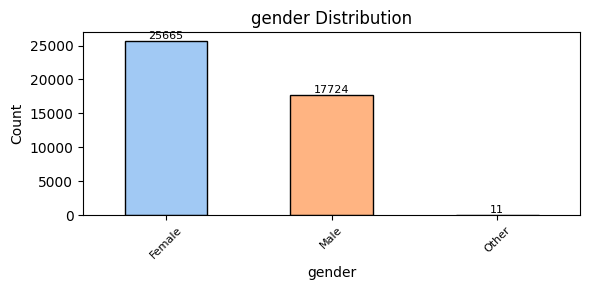

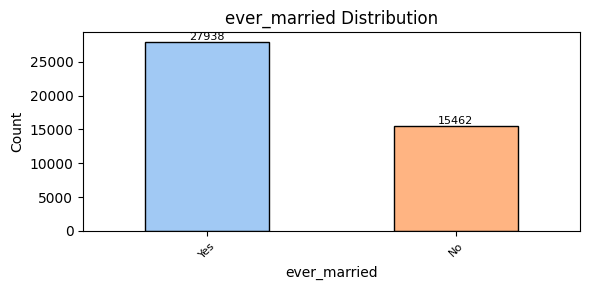

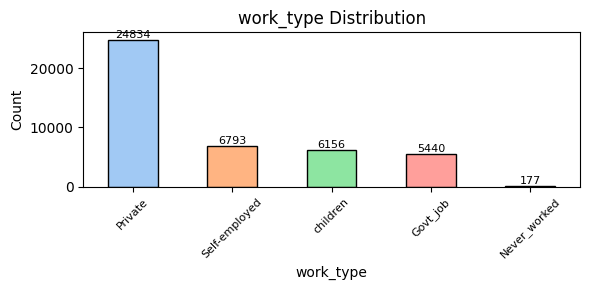

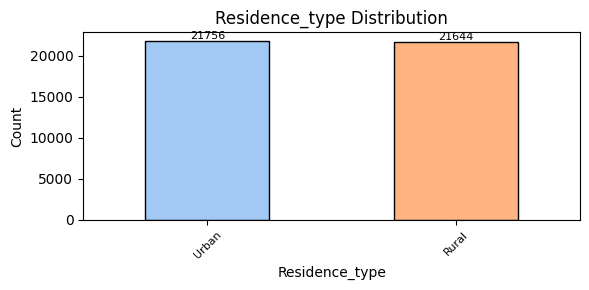

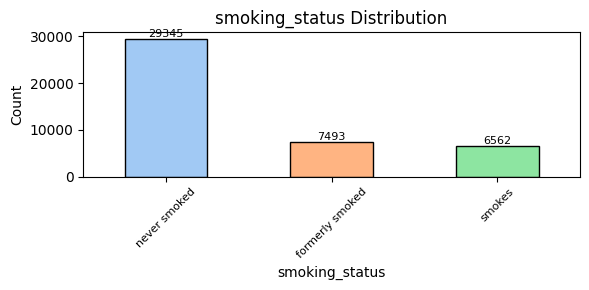

In [48]:
# Set pastel color palette
sns.set_palette("pastel")

# Identify categorical columns
categorical_columns = df.select_dtypes(include=["object", "category"]).columns

# Plot each categorical column
for col in categorical_columns:
    plt.figure(figsize=(6, 3))  # Smaller plot size
    value_counts = df[col].value_counts()
    ax = value_counts.plot(
        kind="bar", color=sns.color_palette("pastel"), edgecolor="black"
    )

    # Add data labels
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height()}",
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha="center",
            va="bottom",
            fontsize=8,
        )

    # Customize the plot
    plt.title(f"{col} Distribution", fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Count", fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.tight_layout()
    plt.show()

**Encoding**


In [49]:
df = df.join(pd.get_dummies(df["gender"]))
df.drop(columns=["gender"], inplace=True)
df.rename(columns={"Female": "female", "Male": "male"}, inplace=True)

df = df.join(pd.get_dummies(df["work_type"]))
df.drop(columns=["work_type"], inplace=True)
df.rename(
    columns={
        "Private": "private_work",
        "Self-employed": "self_employed",
        "Govt_job": "government_work",
        "children": "children_work",
        "Never_worked": "never_worked",
    },
    inplace=True,
)

df = df.join(pd.get_dummies(df["Residence_type"]))
df.drop(columns=["Residence_type"], inplace=True)
df.rename(columns={"Urban": "urban_resident", "Rural": "rural_resident"}, inplace=True)

df = df.join(pd.get_dummies(df["smoking_status"]))
df.drop(columns=["smoking_status"], inplace=True)
df.rename(
    columns={
        "formerly smoked": "formerly_smoked",
        "never smoked": "never_smoked",
        "Unknown": "smoking_unknown",
    },
    inplace=True,
)
df["ever_married"].replace(["Yes", "No"], [1, 0], inplace=True)
df["ever_married"].dtype
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,female,male,Other,government_work,never_worked,private_work,self_employed,children_work,rural_resident,urban_resident,formerly_smoked,never_smoked,smokes
0,3.0,0,0,0,95.12,18.0,0,False,True,False,False,False,False,False,True,True,False,False,True,False
1,58.0,1,0,1,87.96,39.2,0,False,True,False,False,False,True,False,False,False,True,False,True,False
2,8.0,0,0,0,110.89,17.6,0,True,False,False,False,False,True,False,False,False,True,False,True,False
3,70.0,0,0,1,69.04,35.9,0,True,False,False,False,False,True,False,False,True,False,True,False,False
4,14.0,0,0,0,161.28,19.1,0,False,True,False,False,True,False,False,False,True,False,False,True,False


In [50]:
continuous_columns = ["avg_glucose_level", "bmi", "age"]

scaler = StandardScaler()
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

df[continuous_columns].describe()

,avg_glucose_level,bmi,age
count,4.340000e+04,4.340000e+04,4.340000e+04
mean,9.692196e-17,-6.311388e-16,-1.376063e-16
std,1.000012e+00,1.000012e+00,1.000012e+00
min,-1.147792e+00,-2.418236e+00,-1.871183e+00
25%,-6.249586e-01,-6.773255e-01,-8.089870e-01
50%,-2.992896e-01,-1.144748e-01,7.913652e-02
75%,1.759923e-01,5.269133e-01,7.896354e-01
max,4.327576e+00,9.035122e+00,1.766571e+00


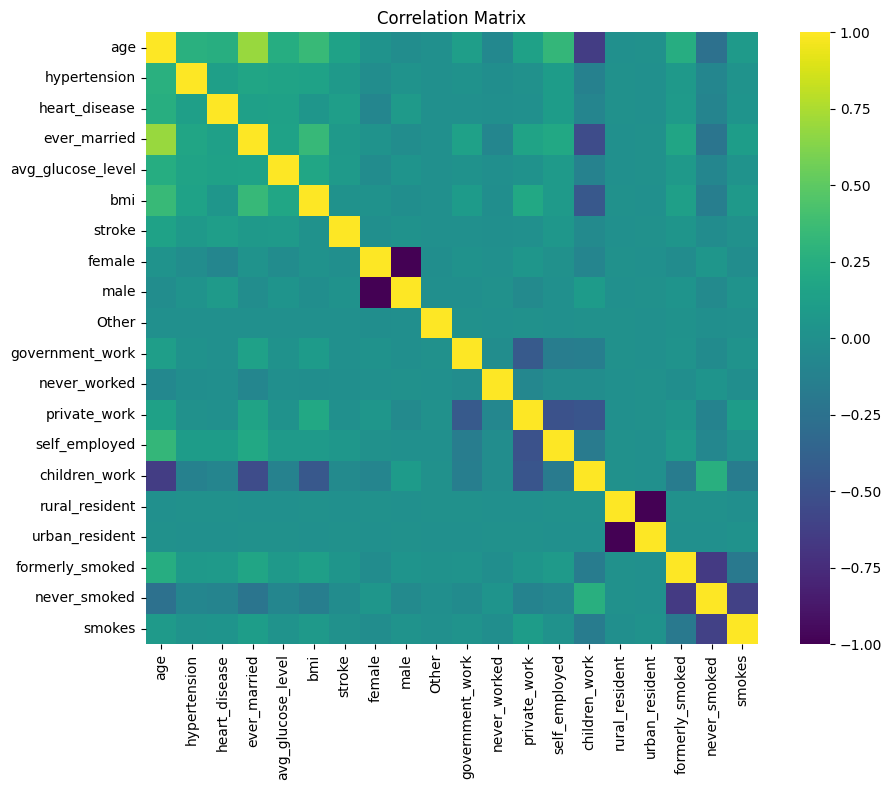

In [51]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(
    correlation_matrix, annot=False, fmt=".2f", cmap="viridis", cbar=True, square=True
)

# Add title and layout adjustments
plt.title("Correlation Matrix", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

## Checking Imabalanced Dataset


In [52]:
print(df["stroke"].value_counts())

stroke
0    42617
1      783
Name: count, dtype: int64


**Over sampling**


In [53]:
X = df.drop(columns=["stroke"])
y = df["stroke"]

In [54]:
# listing all the categorical features
categorical_features = [
    "hypertension",
    "heart_disease",
    "ever_married",
    "female",
    "male",
    "government_work",
    "never_worked",
    "private_work",
    "self_employed",
    "children_work",
    "rural_resident",
    "urban_resident",
    "smoking_unknown",
    "formerly_smoked",
    "never_smoked",
    "smokes",
]

In [55]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

is_categorical_feature_indices = []
for col in X.columns:
    if col in categorical_features:
        is_categorical_feature_indices.append(True)
    else:
        is_categorical_feature_indices.append(False)

smote = SMOTENC(categorical_features=is_categorical_feature_indices)
X_resampled, y_resampled = smote.fit_resample(X, y)

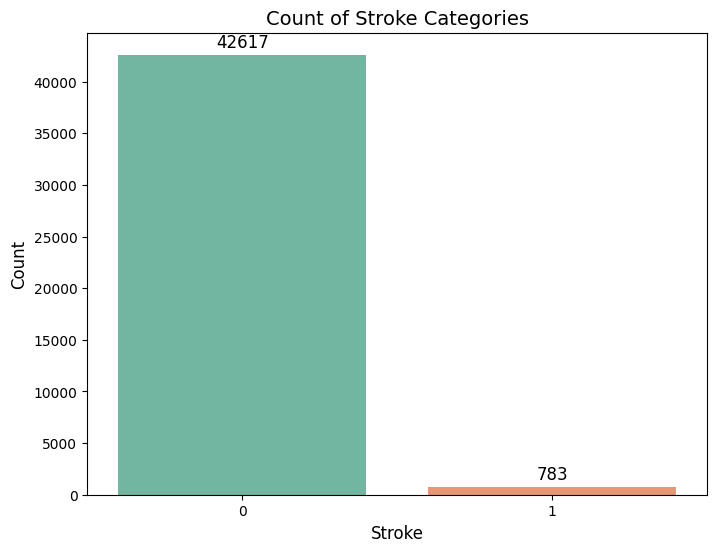

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for the 'stroke' column
plt.figure(figsize=(8, 6))

# Create the count plot for the 'stroke' column
ax = sns.countplot(data=df, x="stroke", palette="Set2")

# Add integer data labels on top of the bars
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="baseline",
        fontsize=12,
        color="black",
        xytext=(0, 5),
        textcoords="offset points",
    )

# Add title and labels
plt.title("Count of Stroke Categories", fontsize=14)
plt.xlabel("Stroke", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show the plot
plt.show()

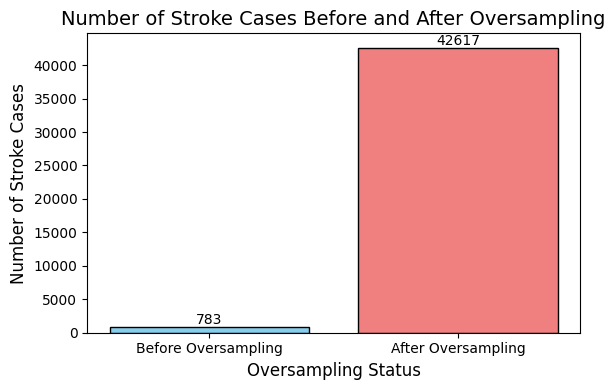

In [57]:
# Calculate the number of stroke cases before and after oversampling
num_stroke_before = y.sum()
num_stroke_after = y_resampled.sum()

# Create a bar chart
plt.figure(figsize=(6, 4))  # Set figure size
bars = plt.bar(
    ["Before Oversampling", "After Oversampling"],
    [num_stroke_before, num_stroke_after],
    color=["skyblue", "lightcoral"],
    edgecolor="black",
)

# Add data labels on top of the bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{int(bar.get_height())}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

# Add titles and labels
plt.title("Number of Stroke Cases Before and After Oversampling", fontsize=14)
plt.xlabel("Oversampling Status", fontsize=12)
plt.ylabel("Number of Stroke Cases", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

**train and test**


In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=10
)

In [59]:
y_resampled.value_counts()

stroke
0    42617
1    42617
Name: count, dtype: int64

In [60]:
# create instances of models that we are willing to test
target_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Neural Network": MLPClassifier(),
}


# fiting the model

for name, model in target_models.items():

    model.fit(X_resampled, y_resampled)

    print(name + " trained.")

Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Neural Network trained.


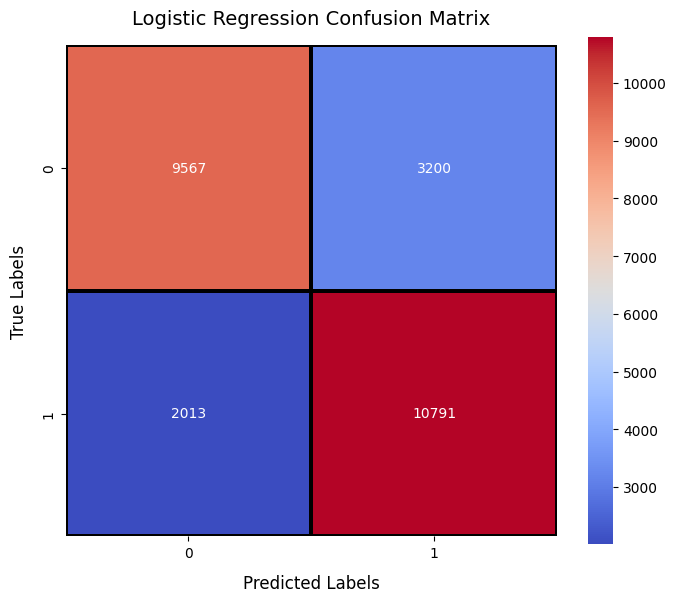

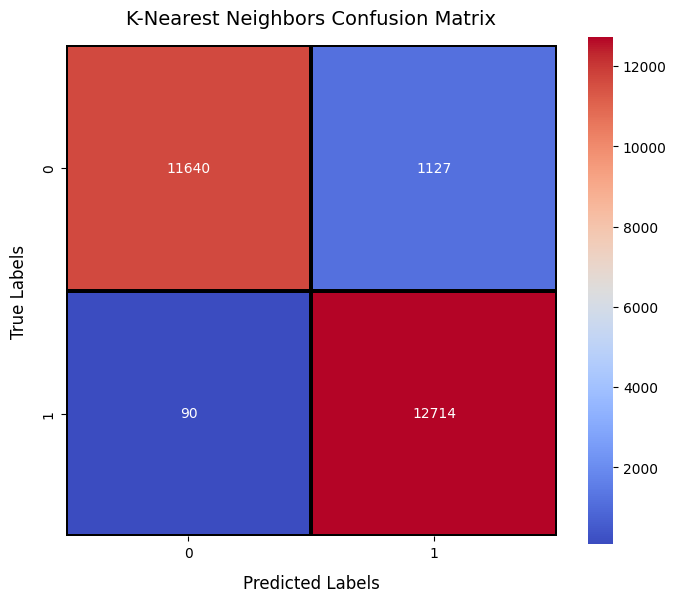

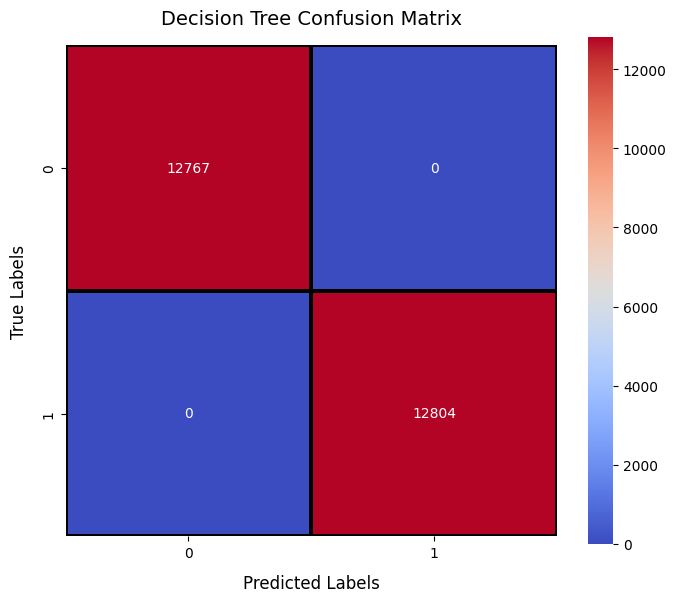

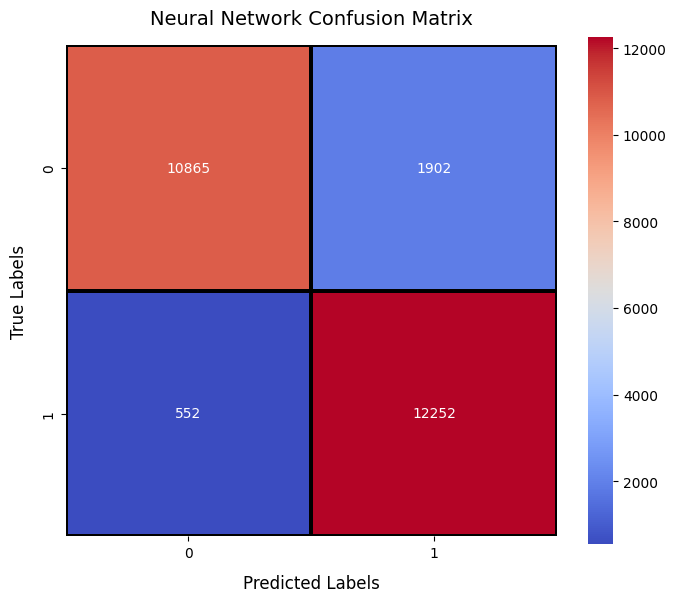

In [61]:
# Iterate through the target models
for name, model in target_models.items():
    # Predict using the current model
    y_pred = model.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap for the confusion matrix with a new color palette
    plt.figure(figsize=(7, 6))  # Slightly larger figure size
    ax = sns.heatmap(
        cm,
        annot=True,
        cmap="coolwarm",
        fmt="g",
        linewidths=1.5,
        linecolor="black",
        square=True,
    )

    # Set axis labels and title
    ax.set_xlabel("Predicted Labels", fontsize=12, labelpad=10)
    ax.set_ylabel("True Labels", fontsize=12, labelpad=10)
    ax.set_title(f"{name} Confusion Matrix", fontsize=14, pad=15)

    # Adjust tick labels
    ax.tick_params(axis="both", which="major", labelsize=10)

    # Show the plot
    plt.tight_layout()
    plt.show()

In [62]:
accuracy_scores = []
error_scores = []

for name, model in target_models.items():
    # Predict and calculate metrics
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    # Append accuracy and error scores
    accuracy_scores.append(accuracy)
    error_scores.append(100 - accuracy)

    # Print metrics
    print(
        f"====== {name} ======\n"
        f"\tAccuracy:  {accuracy:.3f}%\n"
        f"\tPrecision: {precision:.3f}%\n"
        f"\tRecall:    {recall:.3f}%\n"
        f"\tF1-Score:  {f1:.3f}%\n"
    )

====== Logistic Regression ======
	Accuracy:  79.614%
	Precision: 77.128%
	Recall:    84.278%
	F1-Score:  80.545%

====== K-Nearest Neighbors ======
	Accuracy:  95.241%
	Precision: 91.858%
	Recall:    99.297%
	F1-Score:  95.433%

====== Decision Tree ======
	Accuracy:  100.000%
	Precision: 100.000%
	Recall:    100.000%
	F1-Score:  100.000%

====== Neural Network ======
	Accuracy:  90.403%
	Precision: 86.562%
	Recall:    95.689%
	F1-Score:  90.897%



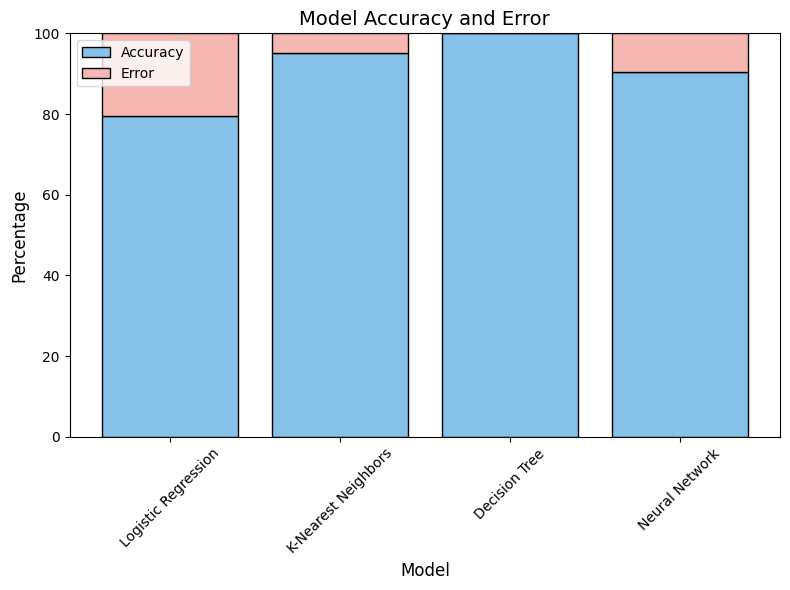

In [66]:
# Create a stacked bar chart for accuracy and error scores
plt.figure(figsize=(8, 6))

# Accuracy bar
plt.bar(
    target_models.keys(),
    accuracy_scores,
    label="Accuracy",
    color="#85C1E9",
    edgecolor="black",
)

# Error bar
plt.bar(
    target_models.keys(),
    error_scores,
    bottom=accuracy_scores,
    label="Error",
    color="#F5B7B1",
    edgecolor="black",
)

# Add labels and title
plt.xlabel("Model", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Model Accuracy and Error", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add a legend
plt.legend(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

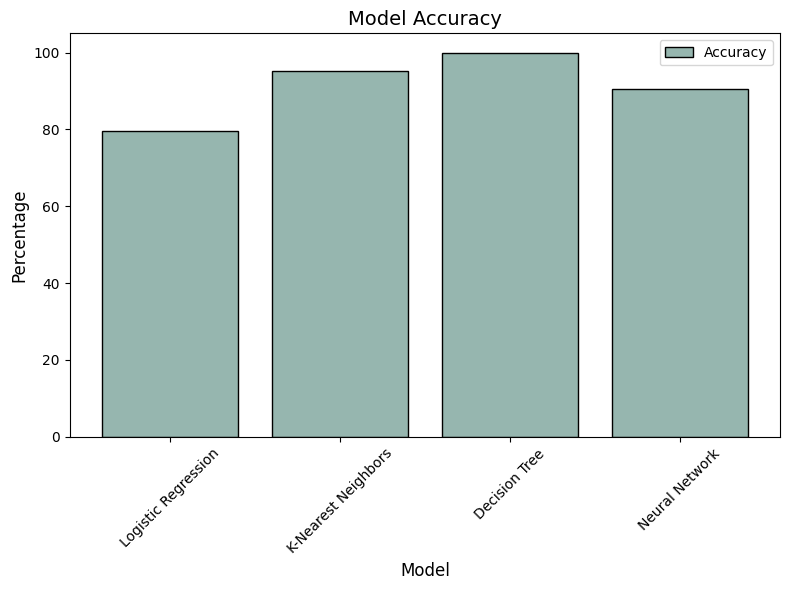

In [67]:
# Create a bar chart for accuracy scores
plt.figure(figsize=(8, 6))

# Plot the accuracy scores
plt.bar(
    target_models.keys(),
    accuracy_scores,
    label="Accuracy",
    color="#96b6af",
    edgecolor="black",
)

# Add labels and title
plt.xlabel("Model", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Model Accuracy", fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, fontsize=10)

# Add legend
plt.legend(fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

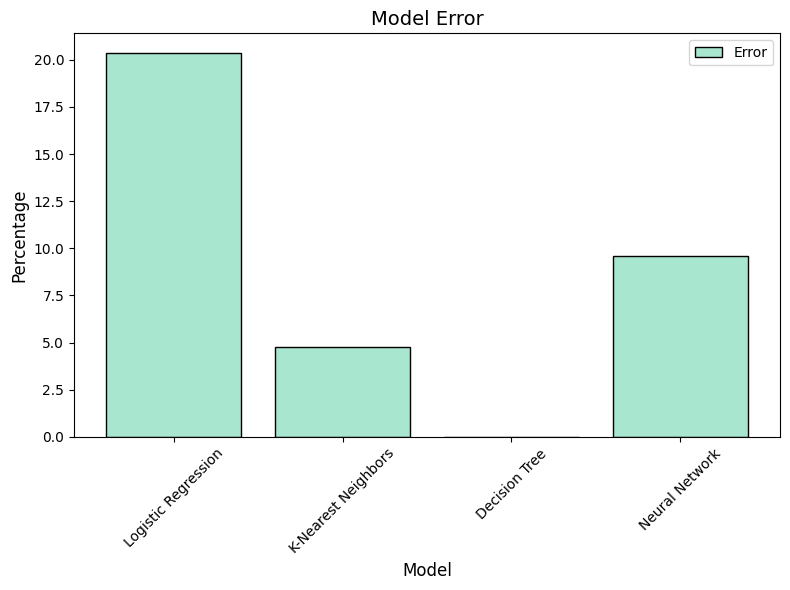

In [68]:
# Create a bar chart for error scores
plt.figure(figsize=(8, 6))

# Plot the error scores
plt.bar(
    target_models.keys(),
    error_scores,
    label="Error",
    color="#A8E6CF",
    edgecolor="black",
)

# Add labels and title
plt.xlabel("Model", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Model Error", fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, fontsize=10)

# Add legend
plt.legend(fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()